In [1]:
import csv
import numpy as np
import pandas as pd

with open('./save/logs', 'r') as log_file:
    log_data = csv.reader(log_file)
    headers = next(log_data)

    rewards = []
    episodes = []
    ep_lengths = []
    ep_run_times = []
    avg_step_run_times = []
#     avg_critic_loss = []
    
    for row in log_data:
        episodes.append(int(row[0]))
        rewards.append(float(row[1]))
        ep_lengths.append(int(row[2]))
        ep_run_times.append(float(row[3]))
        avg_step_run_times.append(float(row[4]))
#         avg_critic_loss.append(float(row[5]))

        
rewards = np.array(rewards)
ep_lengths = np.array(ep_lengths)
ep_run_times = np.array(ep_run_times)
avg_step_run_times = np.array(avg_step_run_times)
# avg_critic_loss = np.array(avg_critic_loss)

In [2]:
headers

['episode',
 'rewards',
 'episode_length',
 'epsiode_run_time',
 'average_step_run_time']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

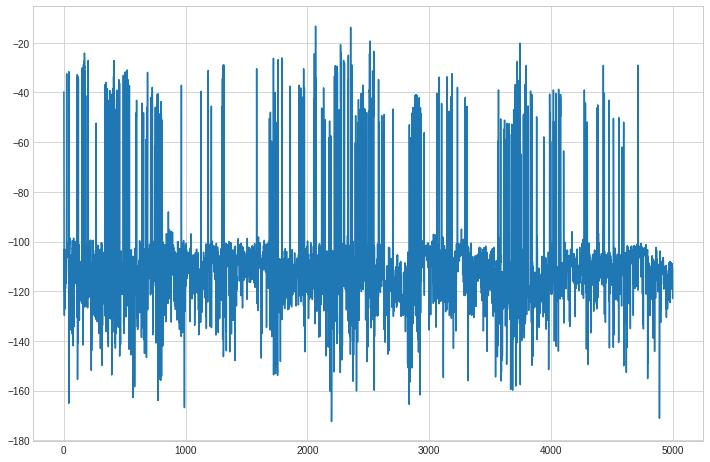

In [4]:
plt.plot(episodes[0:], rewards[0:])

In [5]:
# plt.plot(episodes[20:], avg_critic_loss[20:])

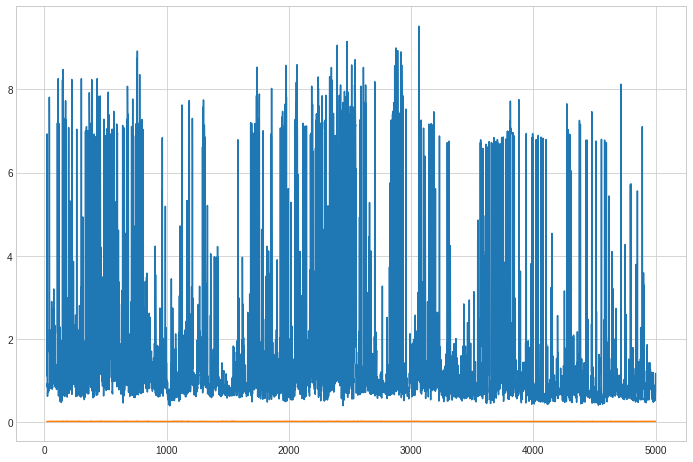

In [6]:
plt.plot(episodes[20:], ep_run_times[20:])
plt.plot(episodes[20:], avg_step_run_times[20:])

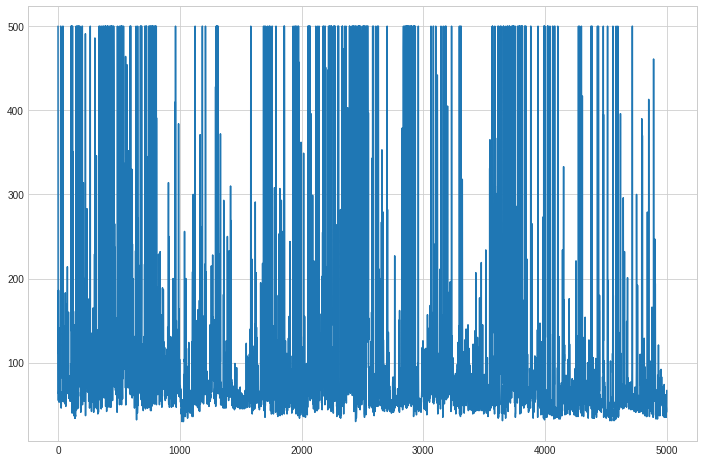

In [7]:
plt.plot(episodes, ep_lengths)

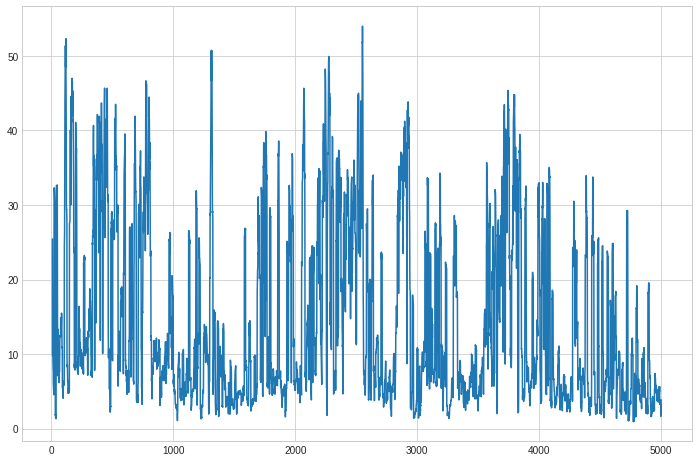

In [8]:
reward_series = pd.Series((rewards)).rolling(10).std()
plt.plot(reward_series)